### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import re
warnings.filterwarnings('ignore') # To ignore warnings

### Read csv file

In [2]:
df = pd.read_csv('data/nha-sach-tiki.csv')

### Data Cleaning

Removing Duplicate Rows in the Data Crawling Process

In [3]:
# Drop duplicate rows based on all columns except 'impression_info' and 'badges_new' because it may changes with each crawl
df.drop_duplicates(subset=df.columns.difference(['impression_info', 'badges_new']), inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)


Remove columns that contain all missing values

In [4]:
df = df.dropna(axis=1, how='all')

Remove columns that have only one unique value

In [5]:
# Calculate the number of unique values in each column
unique_value_counts = df.nunique()

# Select columns that have only one unique value
columns_to_drop = unique_value_counts[unique_value_counts == 1].index.tolist()

# Drop unnecessary columns
df = df.drop(columns_to_drop, axis=1)

Print the information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384195 entries, 0 to 384194
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     384195 non-null  int64  
 1   sku                    384195 non-null  int64  
 2   name                   384195 non-null  object 
 3   url_key                384195 non-null  object 
 4   url_path               384195 non-null  object 
 5   brand_name             114224 non-null  object 
 6   price                  384195 non-null  int64  
 7   badges_new             384195 non-null  object 
 8   discount               384195 non-null  int64  
 9   discount_rate          384195 non-null  int64  
 10  rating_average         384195 non-null  float64
 11  review_count           384195 non-null  int64  
 12  thumbnail_url          384195 non-null  object 
 13  productset_id          384195 non-null  int64  
 14  seller_product_id      384195 non-nu

Count missing values in each column

In [7]:
df.isnull().sum()


id                            0
sku                           0
name                          0
url_key                       0
url_path                      0
brand_name               269971
price                         0
badges_new                    0
discount                      0
discount_rate                 0
rating_average                0
review_count                  0
thumbnail_url                 0
productset_id                 0
seller_product_id             0
quantity_sold            222952
video_url                373483
original_price                0
impression_info               0
availability                  0
primary_category_path         0
seller_id                     0
dtype: int64

Fill missing values in the columns

In [8]:
df['brand_name'].fillna(value='', inplace=True)
df['quantity_sold'].fillna(value=0, inplace=True)
df['video_url'].fillna(value='', inplace=True)

View the first 3 rows of the dataframe 

In [9]:
df[5:7].T


,5,6
id,203464653,193294534
sku,4197888023748,8108976423085
name,Southern Vietnamese Modernist Architecture (Tá...,Ai Weiwei: Spatial Matters - Art Architecture ...
url_key,southern-vietnamese-modernist-architecture-tai...,ai-weiwei-spatial-matters-art-architecture-and...
url_path,southern-vietnamese-modernist-architecture-tai...,ai-weiwei-spatial-matters-art-architecture-and...
brand_name,,
price,380000,390000
badges_new,"[{'code': 'delivery_info_badge', 'placement': ...","[{'code': 'delivery_info_badge', 'placement': ..."
discount,0,0
discount_rate,0,0


Drop unused columns

In [10]:
df.drop(['sku', 'badges_new', 'seller_product_id', 'url_key', 'url_path', 'video_url', 'impression_info'], axis=1, inplace=True)

*quantity_sold* is a string, convert it to integer

In [11]:
# Convert 'price' column to numeric
def extract_numeric_value(row):
    match = re.search(r"'value': (\d+)", row)
    if match:
        return int(match.group(1))
    else:
        return 0

In [12]:
# Convert the 'quantity_sold' column to a string
df['quantity_sold'] = df['quantity_sold'].astype(str)

# Apply the function to extract the numeric value from the 'quantity_sold' column
df['quantity_sold'] = df['quantity_sold'].apply(extract_numeric_value)

### EDA

Summary statistics of numerical columns

In [13]:
# Convert the describe() result to a DataFrame
df_desc = df.describe().transpose()

# Apply custom color to each data cell
styled_desc = df_desc.style.applymap(lambda x: 'background-color: grey' if x > 0 else 'background-color: lightcoral')

# Display the styled table
styled_desc

,count,mean,std,min,25%,50%,75%,max
id,384195.000000,151679349.449826,83174358.881481,40967.000000,77230971.500000,175956866.000000,214732570.500000,263589804.000000
price,384195.000000,144429.321771,366382.106836,990.000000,45600.000000,90000.000000,157000.000000,25200000.000000
discount,384195.000000,13074.120566,44679.973489,0.000000,0.000000,0.000000,13500.000000,9060000.000000
discount_rate,384195.000000,7.692526,11.340609,0.000000,0.000000,0.000000,13.000000,91.000000
rating_average,384195.000000,0.992167,1.943751,0.000000,0.000000,0.000000,0.000000,5.000000
review_count,384195.000000,3.056029,50.334046,0.000000,0.000000,0.000000,0.000000,12740.000000
productset_id,384195.000000,243.691774,52.145325,26.000000,241.000000,248.000000,253.000000,5087.000000
quantity_sold,384195.000000,23.977592,370.907289,0.000000,0.000000,0.000000,3.000000,78390.000000
original_price,384195.000000,157503.442338,378606.002107,1000.000000,50000.000000,99000.000000,172000.000000,25200000.000000
availability,384195.000000,1.002769,0.089871,1.000000,1.000000,1.000000,1.000000,4.000000


- Some products have a discount with a discount rate of 0, which is normal.
- The majority of the data has a rating average of 0 and a review count of 0. We will consider products that have reviews to see information about review count and rating average.

In [14]:
# Filtering products with reviews
reviewed_products = df[df['review_count'] > 0]
# Descriptive statistics for reviewed products
reviewed_products[['rating_average', 'review_count']].describe()


,rating_average,review_count
count,81092.000000,81092.000000
mean,4.700656,14.478753
std,0.683895,108.802286
min,0.000000,1.000000
25%,4.700000,1.000000
50%,5.000000,2.000000
75%,5.000000,6.000000
max,5.000000,12740.000000


Correlation Analysis

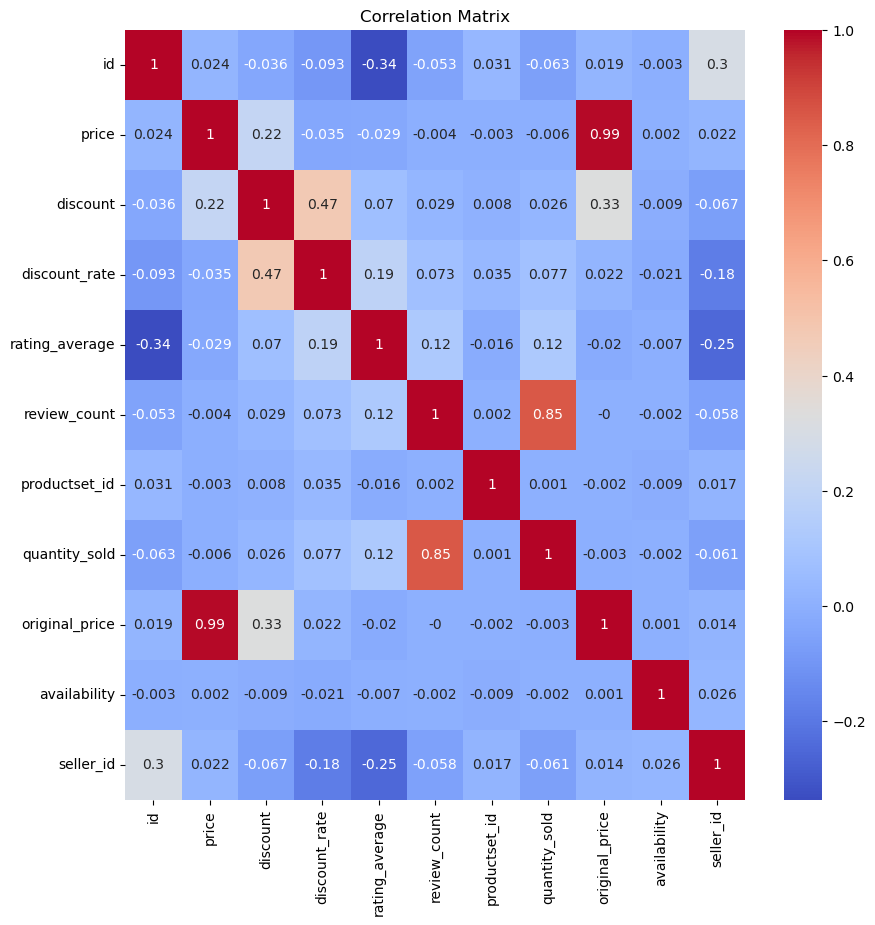

In [15]:
correlation_matrix = df.corr().round(3)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Overall, based on the correlation chart, we can conclude that the relationships between these variables are reasonable and align with our expectations.
- The correlation between "price" and "original_price" is 0.99, suggesting a very high positive correlation. Because ( price = original_price - discount)
- The correlation between "quantity_sold" and "review_count" is 0.85, suggesting a very high positive correlation. 
- The correlation between "discount" and "discount_rate" is 0.47, indicating a moderate positive correlation. Because ( discount_rate = discount / original_price)
- The correlation between "discount" and "original_price" is 0.33, indicating a weak positive correlation. This means that as the original price increases, the  discount tends to slightly increase as well, but the relationship is not as strong.


Save the cleaned data to a new file

In [16]:
df.to_csv('data/nha-sach-tiki-cleaned.csv', index=False) 